COSAS POR HACER

1 REORDENAR LAS TABLAS DE AÑO 2012

2 CAMBIARLE LOS NOMBRES A LA SEGUNDA TABLA

3 SEPARAR LOS ELEMENTOS EN PERIODO A SEMANA Y PERIODO

4 ELIMINAR ELEMENTOS DAÑADOS Y NULOS

POSDATA: AVISARLE AL SERNAPESCA QUE NO ENTIENDO QUE ACS ES EL MODIF DESCANSO 2 :)


In [1]:
#Sector Pinox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk


archivo = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx')
# 'archivo' already contains the excel data, access sheets directly
df = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2014-2024")  # Changed to read the original file
df2 = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2012-2013") # Changed to read the original file
archivo.info()
print(df.head())
archivo.describe()
print(df2.head())
archivo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB
  Código Centro  semana   Año    Región       ACS       

,Código Centro,semana,Año,Región,ACS,Especie,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
0,100068,1,2014,X REGION,ACS 10 A,Salmon Del Atlantico,0.750,1.400,2.900,5.050000,13.1,32
1,100104,1,2014,X REGION,ACS 10 A,Trucha Arcoiris,4.650,4.275,3.275,12.200001,11.8,35
2,100176,1,2014,X REGION,ACS 17 A,Trucha Arcoiris,2.600,2.900,2.600,8.100000,15.6,20
3,100182,1,2014,X REGION,ACS 3 B,Salmon Del Atlantico,1.200,1.250,0.925,3.375000,12,32
4,100189,1,2014,X REGION,ACS 3 B,Trucha Arcoiris,4.575,3.375,2.575,10.525000,12.8,32


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     46175 non-null  object 
 1   Cóigo Centro                46175 non-null  float64
 2   Región                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Parásitos totales promedio  19378 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [4]:
# Filtrar filas donde 'ACS' contiene "ACS" y no hay valores " - " en ninguna columna
df_cleaned = df[df['ACS'].str.contains('ACS', na=False)]
df_cleaned = df_cleaned[~df_cleaned.isin(['-']).any(axis=1)]
df_cleaned['Temperatura'] = pd.to_numeric(df_cleaned['Temperatura'], errors='coerce')
df_cleaned['Salinidad'] = pd.to_numeric(df_cleaned['Salinidad'], errors='coerce')

# Verificar el resultado
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 134736 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            134736 non-null  object 
 1   semana                   134736 non-null  int64  
 2   Año                      134736 non-null  int64  
 3   Región                   134736 non-null  object 
 4   ACS                      134736 non-null  object 
 5   Especie                  134736 non-null  object 
 6   Prom. Hembras Ovígeras   134736 non-null  float64
 7   Prom. Adultos Móviles    134736 non-null  float64
 8   Prom. Juveniles          134736 non-null  float64
 9   Prom. Parásitos Totales  134736 non-null  float64
 10  Temperatura              134736 non-null  float64
 11  Salinidad                134736 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 13.4+ MB


In [5]:
df_cleaned.to_excel('Archivo1 Limpio.xlsx', index = False)

In [6]:
df2.head()

,Período,Cóigo Centro,Región,ACS,Especie,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM
0,Semana 1 (2-ENE-2012 al 8-ENE-2012),110228.0,XI REGION,ACS 25 B,SALMON PLATEADO O COHO,12.55,20.0,0.00,0.00,0.00,0.00,0.0
1,Semana 1 (2-ENE-2012 al 8-ENE-2012),110261.0,XI REGION,ACS 25 B,SALMON DEL ATLANTICO,12.00,22.0,0.00,0.00,0.00,0.00,0.0
2,Semana 1 (2-ENE-2012 al 8-ENE-2012),110714.0,XI REGION,ACS 26 A,SALMON DEL ATLANTICO,12.00,29.0,1.50,1.12,0.88,3.50,2.0
3,Semana 1 (2-ENE-2012 al 8-ENE-2012),104085.0,X REGION,ACS 8,SALMON DEL ATLANTICO,15.70,32.0,0.08,0.00,0.00,0.08,0.0
4,Semana 1 (2-ENE-2012 al 8-ENE-2012),110260.0,XI REGION,ACS 25 A,SALMON PLATEADO O COHO,11.70,19.0,0.00,0.00,0.00,0.00,0.0


In [7]:
# Esto calculará la suma fila por fila para cada registro en las columnas especificadas
# Completar la columna 'Parásitos totales promedio' en df2
df2['Parásitos totales promedio'] = df2['Promedio Juv,'] + df2['Promedio HO'] + df2['Promedio AM']

# Verificar el resultado
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     46175 non-null  object 
 1   Cóigo Centro                46175 non-null  float64
 2   Región                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Parásitos totales promedio  46175 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [8]:
df_cleaned2 = df2[df2['ACS'].str.contains('ACS', na=False)]
df_cleaned2 = df_cleaned2[~df_cleaned2.isin(['-']).any(axis=1)]
df_cleaned2.rename(columns={'Cóigo Centro': 'Código Centro'}, inplace=True)
# Extraer el número de la semana y el año de la columna 'Período'
df_cleaned2['semana'] = df_cleaned2['Período'].str.extract(r'Semana (\d+)').astype(int)
df_cleaned2['Año'] = df_cleaned2['Período'].str.extract(r'(\d{4})').astype(int)

# Guardar los cambios en un nuevo dataset
df_cleaned22 = df_cleaned2.copy()
# Verificar el resultado
df_cleaned22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45522 entries, 0 to 46177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     45522 non-null  object 
 1   Código Centro               45522 non-null  float64
 2   Región                      45522 non-null  object 
 3   ACS                         45522 non-null  object 
 4   Especie                     45522 non-null  object 
 5   Temperatura Promedio        45522 non-null  float64
 6   Salinidad Promedio          45522 non-null  float64
 7   Promedio Juv,               45522 non-null  float64
 8   Promedio HO                 45522 non-null  float64
 9   Promedio AM                 45522 non-null  float64
 10  Parásitos totales promedio  45522 non-null  float64
 11  Promedio HO+AM              45522 non-null  float64
 12  semana                      45522 non-null  int64  
 13  Año                         45522 no

In [9]:
df_cleaned2.to_excel('Archivo2 Limpio.xlsx', index = False)

In [10]:
df_cleaned2.describe()

,Código Centro,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM,semana,Año
count,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000
mean,106907.985545,10.960200,28.984107,2.723362,1.828990,1.860366,6.412718,3.689294,26.932296,2012.317407
std,4571.186536,1.825497,5.085604,6.767838,4.175017,3.914468,13.348841,7.947034,14.791020,0.465472
min,100054.000000,1.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,102158.000000,9.800000,28.000000,0.220000,0.100000,0.150000,0.690000,0.300000,14.000000,2012.000000
50%,110193.000000,10.700000,31.000000,1.020000,0.980000,1.050000,3.530000,2.100000,27.000000,2012.000000
75%,110586.000000,12.050000,32.000000,2.800000,2.400000,2.420000,7.860000,4.880000,40.000000,2013.000000
max,120128.000000,22.000000,92.000000,295.350000,172.850000,155.270000,466.740000,328.120000,52.000000,2013.000000


In [11]:
df_cleaned.describe()

,semana,Año,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
count,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000
mean,26.269067,2018.788943,1.418404,1.883250,2.395443,5.697097,11.004845,28.011943
std,15.075490,3.052937,3.290256,3.947884,5.958211,11.927211,1.935072,5.534747
min,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000
25%,13.000000,2016.000000,0.000000,0.000000,0.000000,0.050000,10.000000,26.000000
50%,26.000000,2019.000000,0.450000,0.575000,0.525000,1.900000,11.000000,30.000000
75%,39.000000,2021.000000,1.950000,2.350000,2.375000,6.925000,12.200000,32.000000
max,53.000000,2024.000000,177.899994,171.850006,323.233337,454.440002,22.500000,95.800003


In [12]:
# Contar elementos que contienen "ACS"
acs_count = df_cleaned22['ACS'].str.contains('ACS', na=False).sum()

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_cleaned22) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 45522
Elementos con otra cosa: 0


In [13]:
# Valores únicos en las columnas Región, semana y Especie
regiones_unicas = df['Región'].unique()
semanas_unicas = df['semana'].unique()
especies_unicas = df['Especie'].unique()

print("Regiones únicas:", regiones_unicas)
print("Semanas únicas:", semanas_unicas)
print("Especies únicas:", especies_unicas)

# Comprobar si hay datos vacíos en la columna 'semana'


Regiones únicas: ['X REGION' 'XI REGION' 'XIV REGION' 'XII REGION' '-']
Semanas únicas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Especies únicas: ['Salmon Del Atlantico' 'Trucha Arcoiris' 'Salmon Plateado O Coho' '-']


In [14]:
import re

# Copia del DataFrame para no modificar el original
df_cleaned2 = df_cleaned2.copy()

# Asegurarse de que la columna 'Período' esté presente en df_cleaned2
if 'Período' not in df_cleaned2.columns and 'Período' in df2.columns:
    df_cleaned2['Período'] = df2['Período']

# Extraer semana y año desde el campo "Período"
def extraer_semana_anio(periodo):
    match = re.search(r"Semana (\d+).*\b(\d{4})\b", str(periodo))
    if match:
        semana = int(match.group(1))
        anio = int(match.group(2))
        return pd.Series([semana, anio])
    return pd.Series([None, None])

df_cleaned2[['semana', 'Año']] = df_cleaned2['Período'].apply(extraer_semana_anio)

# Renombrar columnas para que coincidan
df_cleaned2 = df_cleaned2.rename(columns={
    'Cóigo Centro': 'Código Centro',
    'Temperatura Promedio': 'Temperatura',
    'Salinidad Promedio': 'Salinidad',
    'Promedio HO': 'Prom. Hembras Ovígeras',
    'Promedio AM': 'Prom. Adultos Móviles',
    'Promedio Juv,': 'Prom. Juveniles',
    'Parásitos totales promedio': 'Prom. Parásitos Totales'
})

# Seleccionar solo columnas comunes con df_2014_2024
columnas_comunes = [
    'Código Centro', 'semana', 'Año', 'Región', 'ACS', 'Especie',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles',
    'Prom. Parásitos Totales', 'Temperatura', 'Salinidad'
]

df_cleaned2 = df_cleaned2[columnas_comunes]

# Unir los DataFrames
df_cleaned = df_cleaned.rename(columns={'semana': 'semana', 'Código Centro': 'Código Centro'})
df_unificado = pd.concat([df_cleaned2, df_cleaned[columnas_comunes]], ignore_index=True)

df_unificado.info()
df_unificado.to_excel('Archivo_Unificado_Limpio.xlsx', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180258 entries, 0 to 180257
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            180258 non-null  object 
 1   semana                   180258 non-null  int64  
 2   Año                      180258 non-null  int64  
 3   Región                   180258 non-null  object 
 4   ACS                      180258 non-null  object 
 5   Especie                  180258 non-null  object 
 6   Prom. Hembras Ovígeras   180258 non-null  float64
 7   Prom. Adultos Móviles    180258 non-null  float64
 8   Prom. Juveniles          180258 non-null  float64
 9   Prom. Parásitos Totales  180258 non-null  float64
 10  Temperatura              180258 non-null  float64
 11  Salinidad                180258 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 16.5+ MB


In [15]:
df_unificado.describe()

,semana,Año,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
count,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000
mean,26.436558,2017.156193,1.522093,1.877471,2.478255,5.877818,10.993570,28.257451
std,15.006885,3.861660,3.539142,3.939474,6.174328,12.305633,1.908087,5.441236
min,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000
25%,13.000000,2013.000000,0.000000,0.000000,0.030000,0.125000,9.900000,26.600000
50%,26.000000,2017.000000,0.600000,0.700000,0.650000,2.350000,10.900000,30.000000
75%,39.000000,2020.000000,2.075000,2.375000,2.500000,7.215000,12.100000,32.000000
max,53.000000,2024.000000,177.899994,171.850006,323.233337,466.740000,22.500000,95.800003


In [16]:
# Contar la cantidad de veces que aparece cada elemento en la columna 'Especie'
conteo_especies = df_unificado['Especie'].value_counts()

# Mostrar el resultado
print(conteo_especies)

Especie
Salmon Del Atlantico      112426
SALMON DEL ATLANTICO       29472
Trucha Arcoiris            15128
TRUCHA ARCOIRIS            12537
Salmon Plateado O Coho      7182
SALMON PLATEADO O COHO      3362
SALMON REY O CHINOOK         151
Name: count, dtype: int64


In [17]:

# Crear un diccionario de reemplazo para unificar las especies
reemplazos = {
    'Salmon Del Atlantico': 'Salmon Atlantico',
    'SALMON DEL ATLANTICO': 'Salmon Atlantico',
    'Trucha Arcoiris': 'Trucha Arcoiris',
    'TRUCHA ARCOIRIS': 'Trucha Arcoiris',
    'Salmon Plateado O Coho': 'Salmon Plateado',
    'SALMON PLATEADO O COHO': 'Salmon Plateado',
    'SALMON REY O CHINOOK': 'Salmon Rey'
}

# Reemplazar los valores en la columna 'Especie' usando el diccionario
df_unificado['Especie'] = df_unificado['Especie'].replace(reemplazos)
# Comprobar si hay filas duplicadas en el DataFrame unificado
duplicados = df_unificado.duplicated()
num_duplicados = duplicados.sum()

print(f"Número de filas duplicadas: {num_duplicados}")

# Si quieres ver las filas duplicadas:
if num_duplicados > 0:
    print(df_unificado[duplicados])


Número de filas duplicadas: 16334
      Código Centro  semana   Año     Región       ACS           Especie  \
712        103372.0       3  2012   X REGION  ACS 12 A  Salmon Atlantico   
953        110702.0       4  2012  XI REGION  ACS 23 A  Salmon Atlantico   
1716       110205.0       7  2012  XI REGION  ACS 31 B   Trucha Arcoiris   
2398       110553.0      10  2012  XI REGION  ACS 23 C  Salmon Atlantico   
2600       110216.0      11  2012  XI REGION    ACS 34  Salmon Atlantico   
...             ...     ...   ...        ...       ...               ...   
45517      110143.0      52  2012  XI REGION    ACS 27   Salmon Plateado   
45518      102988.0      52  2012   X REGION    ACS 14        Salmon Rey   
45519      100679.0      52  2012   X REGION  ACS 10 B  Salmon Atlantico   
45520      102818.0      52  2012   X REGION   ACS 9 B   Trucha Arcoiris   
45521      110445.0      52  2012  XI REGION  ACS 22 A  Salmon Atlantico   

       Prom. Hembras Ovígeras  Prom. Adultos Móviles 

In [ ]:
# Analizar duplicados en df2
duplicados_df2 = df2[df2.duplicated()]
num_duplicados_df2 = len(duplicados_df2)
print(f"Número de filas duplicadas en df2: {num_duplicados_df2}")
if num_duplicados_df2 > 0:
    print("Ejemplos de filas duplicadas en df2:")
    print(duplicados_df2.head())
else:
    print("No se encontraron filas duplicadas en df2.")

# Analizar duplicados en df_unificado
if 'df_unificado' in locals():
    duplicados_unificado = df_unificado[df_unificado.duplicated()]
    num_duplicados_unificado = len(duplicados_unificado)
    print(f"Número de filas duplicadas en df_unificado: {num_duplicados_unificado}")
    if num_duplicados_unificado > 0:
        print("Ejemplos de filas duplicadas en df_unificado:")
        print(duplicados_unificado.head())
    else:
        print("No se encontraron filas duplicadas en df_unificado.")
else:
    print("df_unificado no está definido en el entorno actual.")


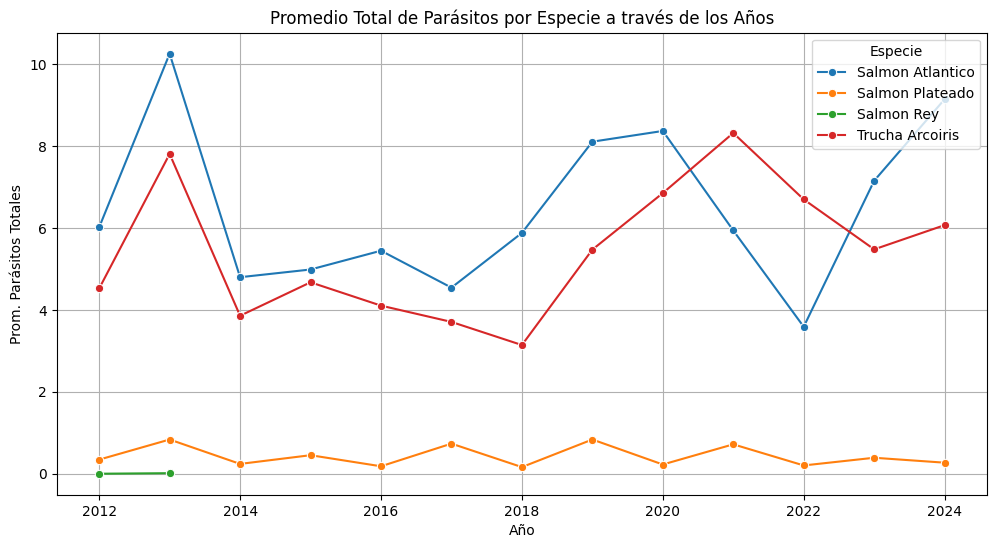

In [21]:
import seaborn as sns

# Agrupar los datos por especie y año, y calcular el promedio de parásitos totales
promedios_por_especie = df_unificado.groupby(['Año', 'Especie'])['Prom. Parásitos Totales'].mean().reset_index()

# Ordenar los datos por año
promedios_por_especie = promedios_por_especie.sort_values(by=['Año'])

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_especie, x='Año', y='Prom. Parásitos Totales', hue='Especie', marker='o')

# Configurar etiquetas y título
plt.title('Promedio Total de Parásitos por Especie a través de los Años')
plt.xlabel('Año')
plt.ylabel('Prom. Parásitos Totales')
plt.legend(title='Especie')
plt.grid(True)
plt.savefig("grafico_personalizadopromedio.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la gráfica
plt.show()

In [22]:
#Calcular el promedio de parásitos totales y hembras ovígeras
promedio_parasitos_totales = df_unificado['Prom. Parásitos Totales'].mean()
promedio_hembras_ovigeras = df_unificado['Prom. Hembras Ovígeras'].mean()

#Filtrar solo las filas donde la especie es "salmon del atlantico"
salmones = df_unificado[df_unificado['Especie'] == 'Salmon Atlantico']
#Calcular el promedio de hembras ovígeras en los salmones
promedio_hembras_ovigeras_salmones = salmones['Prom. Hembras Ovígeras'].mean()

#Mostrar el resultado
print(f"Promedio de hembras ovígeras en los salmones: {promedio_hembras_ovigeras_salmones:.2f}")
#Calcular el promedio de parásitos totales en los salmones
promedio_parasitos_salmones = salmones['Prom. Parásitos Totales'].mean()

#Mostrar el resultado
print(f"Promedio de parásitos totales en los salmones: {promedio_parasitos_salmones:.2f}")
print(f"Promedio de parásitos totales: {promedio_parasitos_totales:.2f}")
print(f"Promedio de hembras ovígeras: {promedio_hembras_ovigeras:.2f}")

Promedio de hembras ovígeras en los salmones: 1.66
Promedio de parásitos totales en los salmones: 6.42
Promedio de parásitos totales: 5.88
Promedio de hembras ovígeras: 1.52


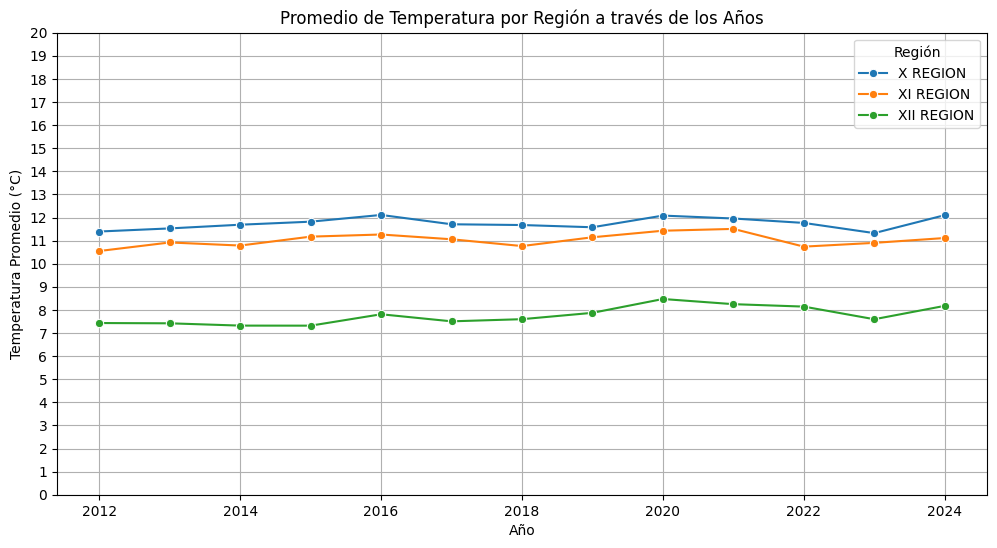

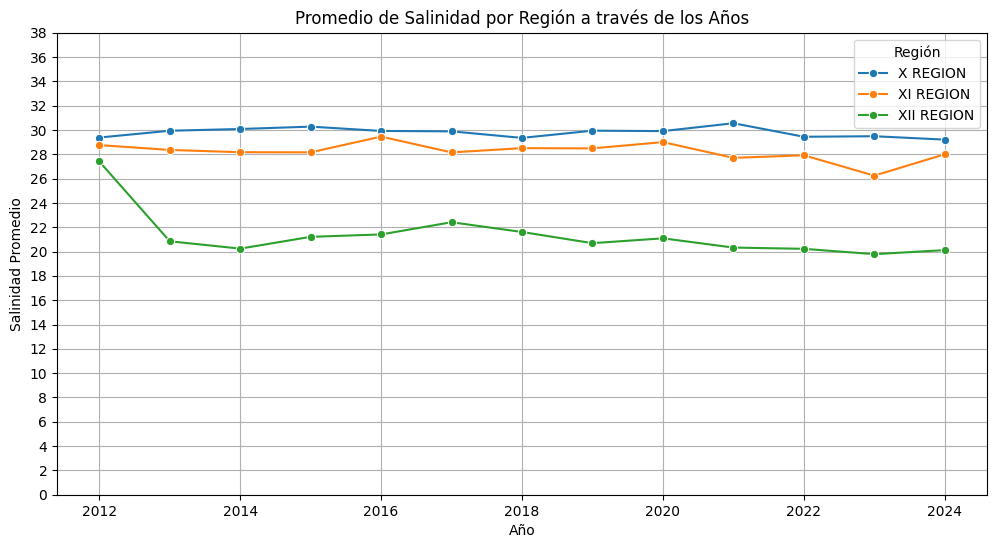

In [23]:
import seaborn as sns

# Agrupar los datos por región y año, calculando el promedio de temperatura y salinidad
promedios_por_region_anio = df_unificado.groupby(['Año', 'Región']).agg({
    'Temperatura': 'mean',
    'Salinidad': 'mean'
}).reset_index()

# Gráfico 1: Relación de la temperatura por región a través de los años
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='Año', y='Temperatura', hue='Región', marker='o')
plt.title('Promedio de Temperatura por Región a través de los Años')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio (°C)')
plt.legend(title='Región', loc='upper right')
plt.grid(True)
plt.ylim(0, 20)
plt.yticks(range(0, 21, 1))
plt.savefig("grafico_personalizadostemperatura.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Gráfico 2: Relación de la salinidad por región a través de los años
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='Año', y='Salinidad', hue='Región', marker='o')
plt.title('Promedio de Salinidad por Región a través de los Años')
plt.xlabel('Año')
plt.ylabel('Salinidad Promedio')
plt.legend(title='Región', loc='upper right')
plt.grid(True)
plt.ylim(0, 20)
plt.yticks(range(0, 40, 2))
plt.savefig("grafico_salinidad.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


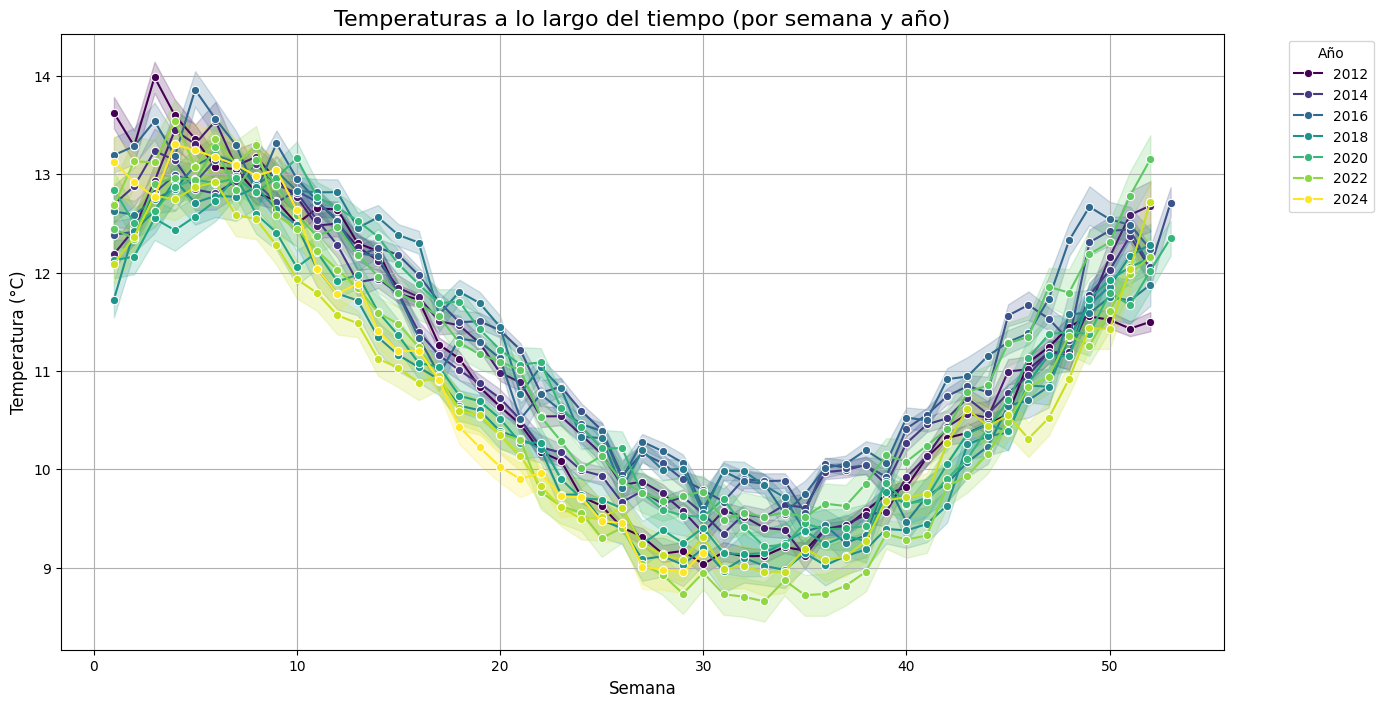

In [24]:
# Crear un gráfico de líneas para mostrar todas las temperaturas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_unificado, x='semana', y='Temperatura', hue='Año', palette='viridis', marker='o')

# Configurar etiquetas y título
plt.title('Temperaturas a lo largo del tiempo (por semana y año)', fontsize=16)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.show()

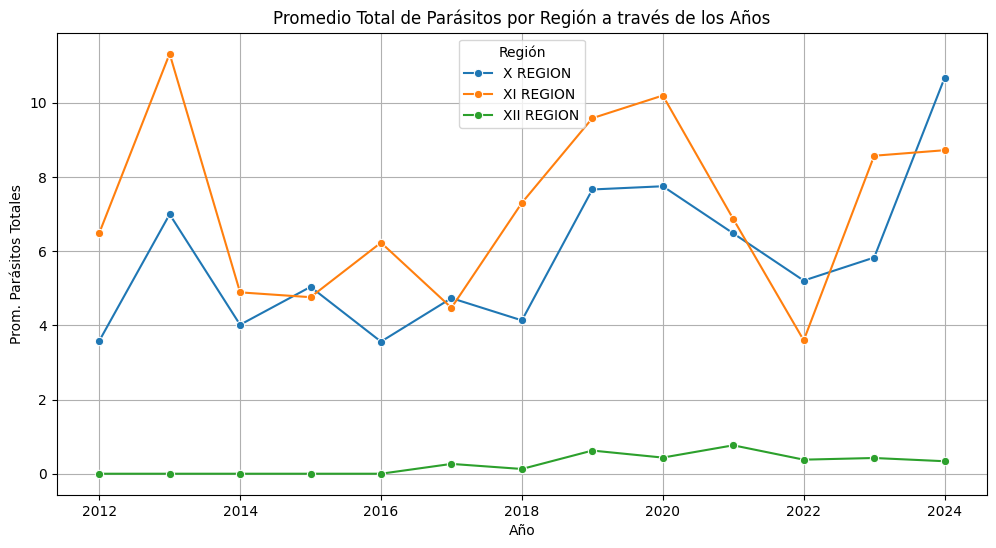

In [25]:
import seaborn as sns
promedios_por_region_anio = df_unificado.groupby(['Año', 'Región']).agg({
    'Temperatura': 'mean',
    'Prom. Parásitos Totales': 'mean'
}).reset_index()
# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='Año', y='Prom. Parásitos Totales', hue='Región', marker='o')

# Configurar etiquetas y título
plt.title('Promedio Total de Parásitos por Región a través de los Años')
plt.xlabel('Año')
plt.ylabel('Prom. Parásitos Totales')
plt.legend(title='Región')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [26]:
# Calcular estadísticas para Temperatura
min_temperatura = df_unificado['Temperatura'].min()
max_temperatura = df_unificado['Temperatura'].max()
promedio_temperatura = df_unificado['Temperatura'].mean()

# Calcular estadísticas para Salinidad
min_salinidad = df_unificado['Salinidad'].min()
max_salinidad = df_unificado['Salinidad'].max()
promedio_salinidad = df_unificado['Salinidad'].mean()

# Mostrar resultados
print(f"Temperatura - Mínimo: {min_temperatura}, Máximo: {max_temperatura}, Promedio: {promedio_temperatura:.2f}")
print(f"Salinidad - Mínimo: {min_salinidad}, Máximo: {max_salinidad}, Promedio: {promedio_salinidad:.2f}")

Temperatura - Mínimo: 0.8999999761581421, Máximo: 22.5, Promedio: 10.99
Salinidad - Mínimo: 0.6999999880790712, Máximo: 95.80000305175781, Promedio: 28.26


In [27]:
df_unificado.to_excel('Archivo_Unificado_Limpio.xlsx', index = False)

In [28]:
# Contar elementos que contienen "ACS"
acs_count = df_unificado['ACS'].str.contains('ACS', na=False).sum()

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_unificado) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 180258
Elementos con otra cosa: 0
